In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Ludhiana.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Ice Cream Studio,400,"Ice Cream,Desserts",Ludhiana,Sarabha Nagar,Dessert Parlor,1130am to 1am(Mon-Sun),Excellent,4.8,927
1,The Table By Basant,600,"North Indian,Pizza,Fast Food,Burger,Sandwich,R...",Ludhiana,Gurudev Nagar,Casual Dining,11am to 11pm(Mon-Sun),Very Good,4.3,888
2,Natural Soups & Shakes,300,"South Indian,Pizza,Street Food,Beverages,Fast ...",Ludhiana,Civil Lines,Quick Bites,430pm to 1130pm(Mon-Sun),Excellent,4.5,903
3,Rishi Vegetarian Dhaba NK,300,North Indian,Ludhiana,Gill Road,Dhaba,9am to 11pm(Mon-Sun),Very Good,4.2,2166
4,Natural 2,250,"North Indian,Fast Food,Rolls,Momos,Chinese,Bur...",Ludhiana,Civil Lines,Quick Bites,5pm to 11pm(Mon-Sun),Very Good,4.3,526


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 10 columns):
Name                985 non-null object
Price               985 non-null int64
Cuisine_Category    985 non-null object
City                985 non-null object
Region              985 non-null object
Cuisine_Type        985 non-null object
Timing              983 non-null object
Rating_Types        985 non-null object
Rating              985 non-null float64
Votes               985 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 77.0+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,985.000000,985.000000,985.000000
mean,415.613198,3.475736,122.269036
std,288.023270,0.412914,220.697291
min,0.000000,2.200000,4.000000
25%,250.000000,3.200000,15.000000
50%,300.000000,3.500000,40.000000
75%,500.000000,3.800000,120.000000
max,2000.000000,4.800000,2166.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              2
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Baba Chicken             6
New New York Pizzeria    4
Pizza Hut                4
Samosa Express           3
Jain Snacks Corner       2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Ludhiana Junction       107
Model Town              107
Dugri                    91
Civil Lines              83
Sector 32-- Ludhiana     81
PAU                      78
Industrial Area          63
BRS Nagar                62
Sarabha Nagar            56
Pakhowal Road            43
Name: Region, dtype: int64

Text(0.5,1,'Region')

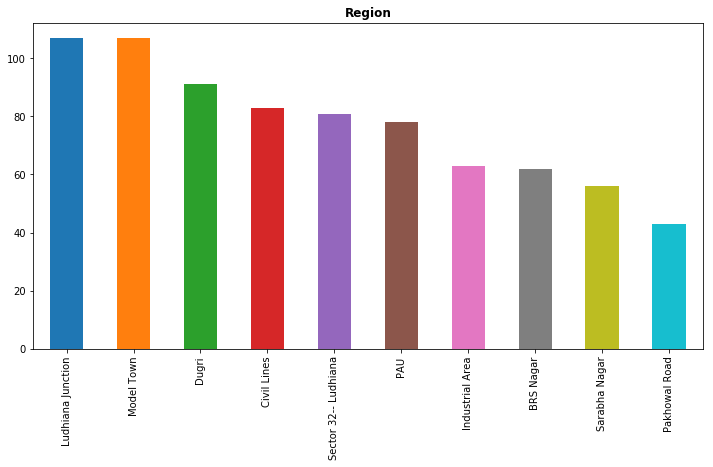

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

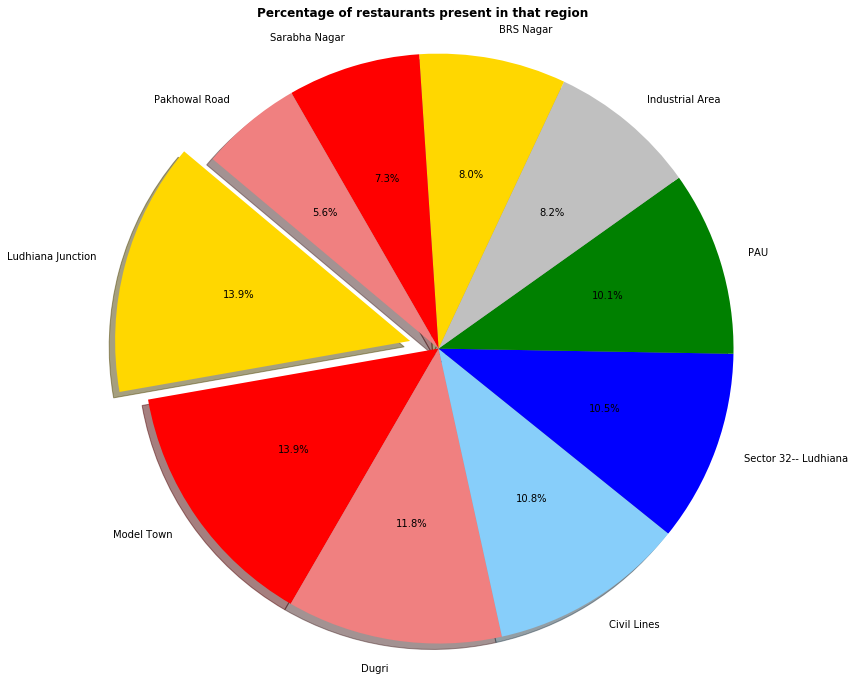

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average        487
Good           364
Very Good      119
Excellent        9
Poor             4
Velmi dobré      1
İyi              1
Name: Rating_Types, dtype: int64

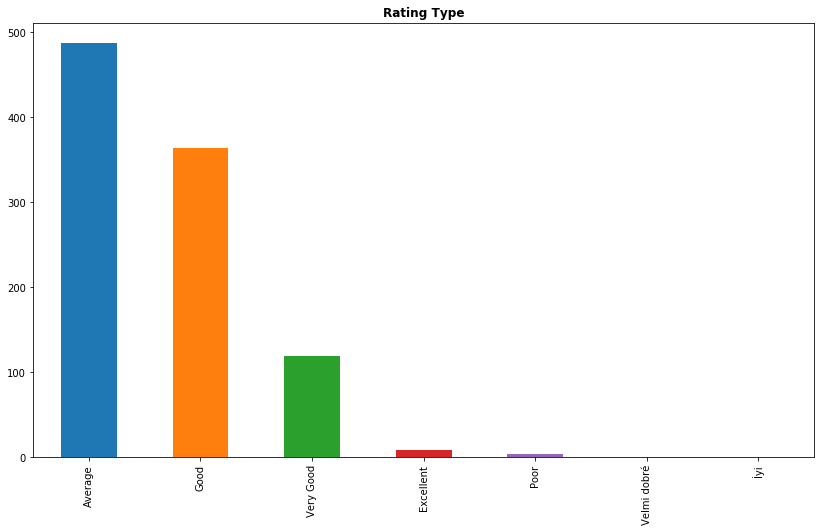

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       557
Casual Dining     141
none               60
Dhaba              43
Bakery             39
Café               28
Sweet Shop         28
Dessert Parlor     26
Beverage Shop      17
Kiosk              12
Name: Cuisine_Type, dtype: int64

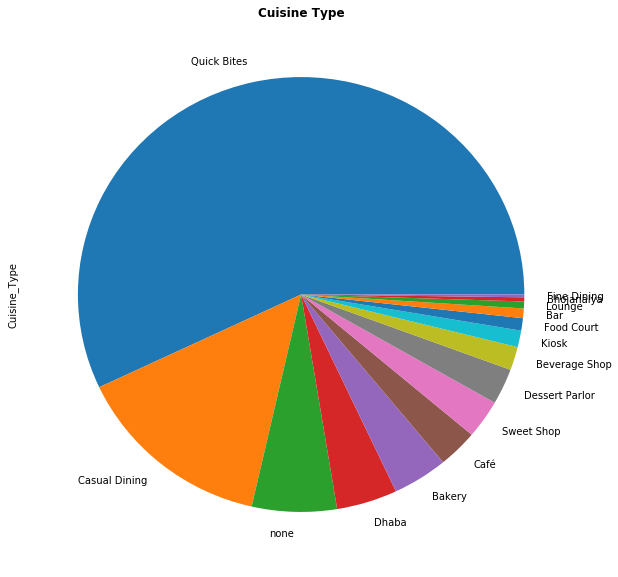

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4753814852492395


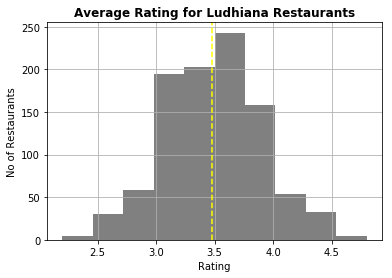

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Ludhiana Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Ludhiana is found to be around 3.47

# Top cuisines in Ludhiana

In [22]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

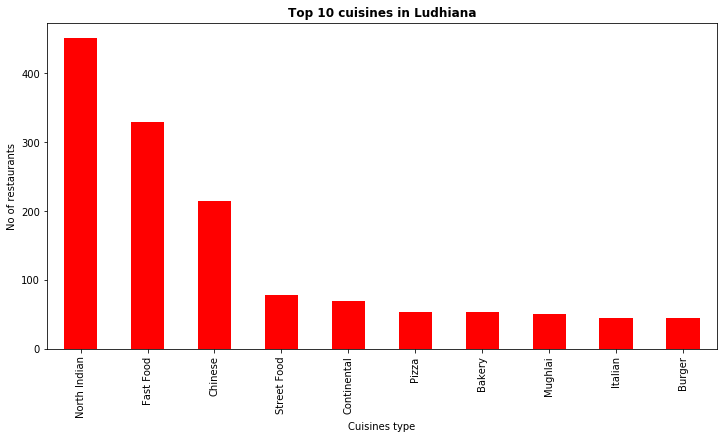

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Ludhiana',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [24]:
data['Price'].value_counts()[:20]

300     161
200     129
400     129
500      91
250      89
150      70
600      51
350      45
100      43
800      29
700      29
450      26
1000     25
1200     17
1500     12
550       6
1400      6
650       5
1100      4
1600      3
Name: Price, dtype: int64

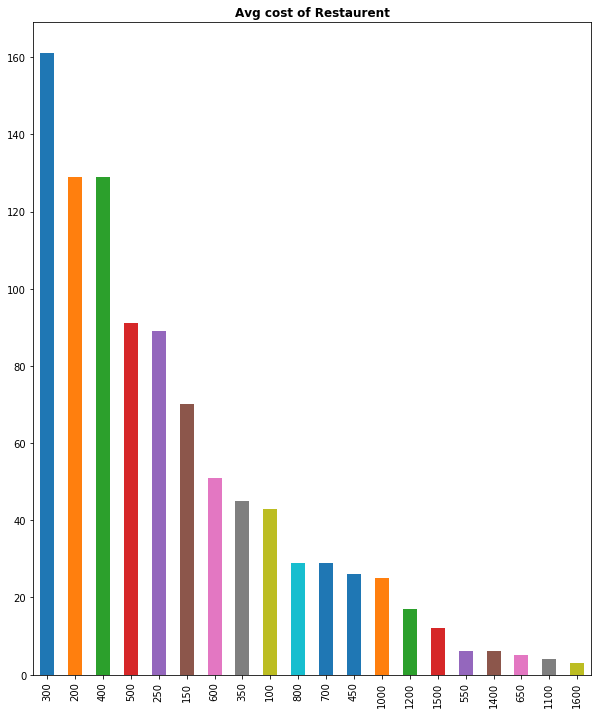

In [26]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [27]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

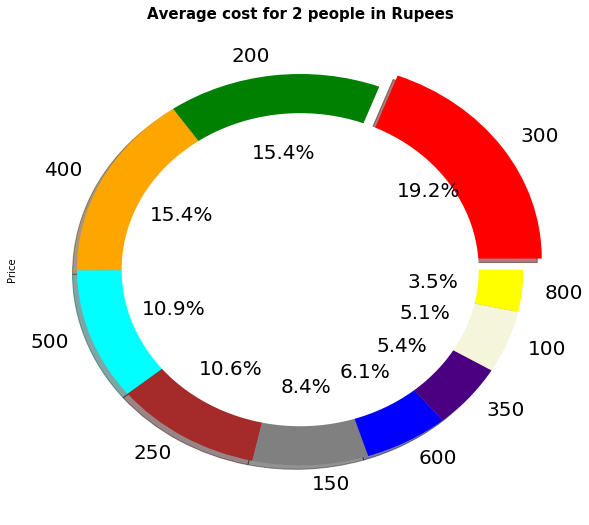

In [28]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300